In [1]:
#1)Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
#2)Reading data
df=pd.read_csv("Melbourne_housing_FULL.csv",parse_dates=['Date'])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

In [5]:
#3)Scrub data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [54]:
df.shape

(34857, 21)

In [7]:
df['Date']=df['Date'].dt.year

In [9]:
df['Date'][:10]

0    2016
1    2016
2    2016
3    2016
4    2017
5    2017
6    2016
7    2016
8    2016
9    2016
Name: Date, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  int64  
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [11]:
#3.1)Delete unnecessary columns
del df['Address']
del df['Method']
del df['SellerG']
del df['Postcode']
del df['Lattitude']
del df['Longtitude']
del df['Propertycount']

In [12]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        34857 non-null  object 
 1   Rooms         34857 non-null  int64  
 2   Type          34857 non-null  object 
 3   Price         27247 non-null  float64
 4   Date          34857 non-null  int64  
 5   Distance      34856 non-null  float64
 6   Bedroom2      26640 non-null  float64
 7   Bathroom      26631 non-null  float64
 8   Car           26129 non-null  float64
 9   Landsize      23047 non-null  float64
 10  BuildingArea  13742 non-null  float64
 11  YearBuilt     15551 non-null  float64
 12  CouncilArea   34854 non-null  object 
 13  Regionname    34854 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 3.7+ MB


In [14]:
df.shape

(34857, 14)

In [15]:
#3.2)dropping missing values
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8895 entries, 2 to 34856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        8895 non-null   object 
 1   Rooms         8895 non-null   int64  
 2   Type          8895 non-null   object 
 3   Price         8895 non-null   float64
 4   Date          8895 non-null   int64  
 5   Distance      8895 non-null   float64
 6   Bedroom2      8895 non-null   float64
 7   Bathroom      8895 non-null   float64
 8   Car           8895 non-null   float64
 9   Landsize      8895 non-null   float64
 10  BuildingArea  8895 non-null   float64
 11  YearBuilt     8895 non-null   float64
 12  CouncilArea   8895 non-null   object 
 13  Regionname    8895 non-null   object 
dtypes: float64(8), int64(2), object(4)
memory usage: 1.0+ MB


In [17]:
df.shape

(8895, 14)

In [18]:
#3.3)non numeric to numeric
#df=pd.get_dummies(df,columns=['Suburb','Type','CouncilArea','Regionname'] )

In [19]:
print(df['Type'].unique())
print(df['Type'].nunique())

['h' 'u' 't']
3


In [20]:
df['Type'].value_counts()

h    6628
u    1541
t     726
Name: Type, dtype: int64

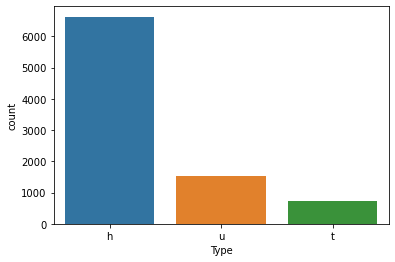

In [21]:
sns.countplot(x='Type',data=df);

In [22]:
#h- house,cottage,villa, semi,terrace
#u- unit, duplex
#t- townhouse
df['Type']=df['Type'].map({'h':0,'u':1,'t':2})

In [23]:
#similarly for Council Area
print(df['CouncilArea'].unique())
print(df['CouncilArea'].nunique())

['Yarra City Council' 'Moonee Valley City Council'
 'Port Phillip City Council' 'Darebin City Council'
 'Hobsons Bay City Council' 'Stonnington City Council'
 'Boroondara City Council' 'Monash City Council' 'Glen Eira City Council'
 'Whitehorse City Council' 'Maribyrnong City Council'
 'Bayside City Council' 'Moreland City Council' 'Manningham City Council'
 'Melbourne City Council' 'Banyule City Council' 'Brimbank City Council'
 'Kingston City Council' 'Hume City Council' 'Knox City Council'
 'Melton City Council' 'Maroondah City Council'
 'Greater Dandenong City Council' 'Nillumbik Shire Council'
 'Whittlesea City Council' 'Frankston City Council'
 'Macedon Ranges Shire Council' 'Yarra Ranges Shire Council'
 'Wyndham City Council' 'Casey City Council' 'Cardinia Shire Council'
 'Mitchell Shire Council' 'Moorabool Shire Council']
33


In [24]:
df['CouncilArea'].value_counts()

Boroondara City Council           810
Darebin City Council              729
Moreland City Council             647
Moonee Valley City Council        556
Glen Eira City Council            519
Maribyrnong City Council          491
Melbourne City Council            458
Brimbank City Council             416
Banyule City Council              413
Hume City Council                 392
Bayside City Council              362
Port Phillip City Council         329
Yarra City Council                323
Monash City Council               299
Hobsons Bay City Council          289
Stonnington City Council          280
Manningham City Council           267
Whittlesea City Council           244
Kingston City Council             210
Wyndham City Council              169
Whitehorse City Council           126
Melton City Council               107
Maroondah City Council            107
Knox City Council                 103
Frankston City Council             87
Greater Dandenong City Council     51
Casey City C

In [25]:
df['CouncilArea']=df['CouncilArea'].map({'Yarra City Council':0,
                                         'Moonee Valley City Council':1,
                                         'Port Phillip City Council':2,
                                         'Darebin City Council':3,
                                         'Hobsons Bay City Council':4, 
                                         'Stonnington City Council':5,
                                         'Boroondara City Council':6,
                                         'Monash City Council':7,
                                         'Glen Eira City Council':8, 
                                         'Whitehorse City Council':9,
                                         'Maribyrnong City Council':10,
                                         'Bayside City Council':11,
                                         'Moreland City Council':12,
                                         'Manningham City Council':13,
                                         'Melbourne City Council':14,
                                         'Banyule City Council':15,
                                         'Brimbank City Council':16,
                                         'Kingston City Council':17,
                                         'Hume City Council':18,
                                         'Knox City Council':19,
                                         'Maroondah City Council':20,
                                         'Casey City Council':21,
                                         'Melton City Council':22,
                                         'Greater Dandenong City Council':23,
                                         'Nillumbik Shire Council':24,
                                         'Cardinia Shire Council':25,
                                         'Whittlesea City Council':26,
                                         'Frankston City Council':27,
                                         'Macedon Ranges Shire Council':28,
                                         'Yarra Ranges Shire Council':29,
                                         'Wyndham City Council':30,
                                         'Moorabool Shire Council':31,
                                         'Mitchell Shire Council':32})

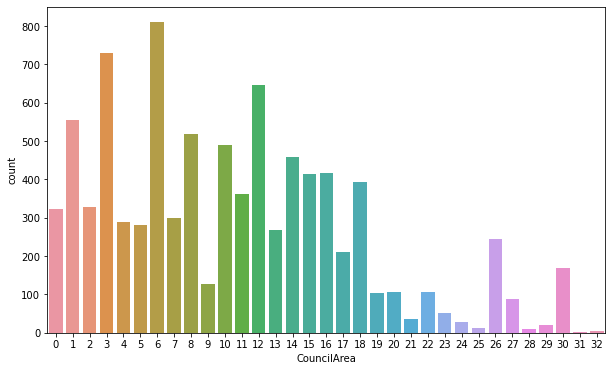

In [26]:
fig,ax=plt.subplots(figsize=(10,6))

sns.countplot(x='CouncilArea',data=df);

In [27]:
df['CouncilArea'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 22, 20, 23, 24, 26, 27, 28, 29, 30, 21, 25, 32, 31],
      dtype=int64)

In [28]:
#similarly for Regionname
print(df['Regionname'].unique())
print(df['Regionname'].nunique())

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']
8


In [29]:
df['Regionname'].value_counts()

Southern Metropolitan         2707
Northern Metropolitan         2618
Western Metropolitan          2060
Eastern Metropolitan           982
South-Eastern Metropolitan     372
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

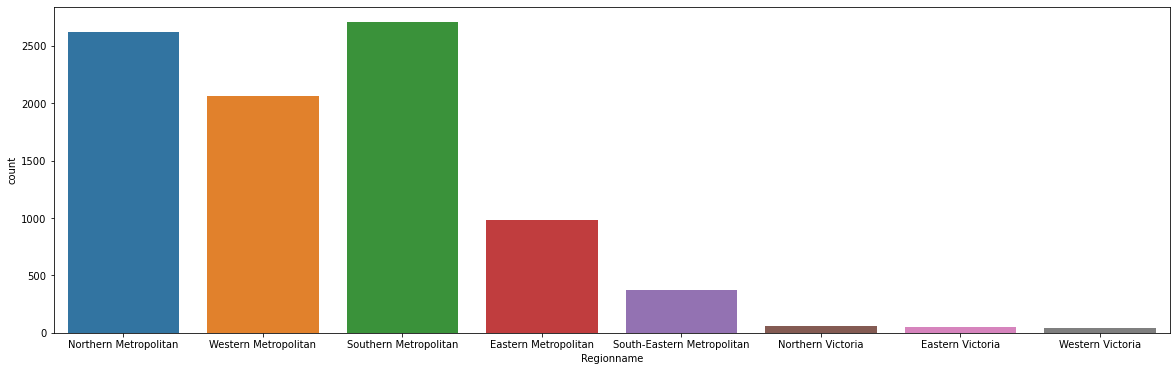

In [30]:
fig,ax=plt.subplots(figsize=(20,6))

sns.countplot(x='Regionname',data=df);

In [31]:
df['Regionname']=df['Regionname'].map({'Northern Metropolitan':0,
                                       'Western Metropolitan':1,
                                       'Southern Metropolitan':2,
                                       'Eastern Metropolitan':3,
                                       'South-Eastern Metropolitan':4,
                                       'Northern Victoria':5,
                                       'Eastern Victoria':6,
                                       'Western Victoria':7})

In [32]:
print(df['Regionname'].unique())
print(df['Regionname'].nunique())

[0 1 2 3 4 5 6 7]
8


In [33]:
print(df['Suburb'].unique())
print(len(df['Suburb'].unique()))
dic={}
j=0
for i in df['Suburb'].unique():
    dic[str(i)]=j
    j+=1

['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong' 'Melbourne'
 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin' 'Newport'
 'Niddrie' 'North Melbourne' 'Northcote' 'Oak Park

In [34]:
dic

{'Abbotsford': 0,
 'Airport West': 1,
 'Albert Park': 2,
 'Alphington': 3,
 'Altona': 4,
 'Altona North': 5,
 'Armadale': 6,
 'Ascot Vale': 7,
 'Ashburton': 8,
 'Ashwood': 9,
 'Avondale Heights': 10,
 'Balaclava': 11,
 'Balwyn': 12,
 'Balwyn North': 13,
 'Bentleigh': 14,
 'Bentleigh East': 15,
 'Box Hill': 16,
 'Braybrook': 17,
 'Brighton': 18,
 'Brighton East': 19,
 'Brunswick': 20,
 'Brunswick West': 21,
 'Bulleen': 22,
 'Burwood': 23,
 'Camberwell': 24,
 'Canterbury': 25,
 'Carlton North': 26,
 'Carnegie': 27,
 'Caulfield': 28,
 'Caulfield North': 29,
 'Caulfield South': 30,
 'Chadstone': 31,
 'Clifton Hill': 32,
 'Coburg': 33,
 'Coburg North': 34,
 'Collingwood': 35,
 'Doncaster': 36,
 'Eaglemont': 37,
 'Elsternwick': 38,
 'Elwood': 39,
 'Essendon': 40,
 'Essendon North': 41,
 'Fairfield': 42,
 'Fitzroy': 43,
 'Fitzroy North': 44,
 'Flemington': 45,
 'Footscray': 46,
 'Glen Iris': 47,
 'Glenroy': 48,
 'Gowanbrae': 49,
 'Hadfield': 50,
 'Hampton': 51,
 'Hampton East': 52,
 'Hawthorn

In [35]:
df['Suburb']=df['Suburb'].map(dic)

In [36]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname'],
      dtype='object')

In [37]:
df

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
2,0,2,0,1035000.0,2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,0,0
4,0,3,0,1465000.0,2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,0,0
6,0,4,0,1600000.0,2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,0,0
11,0,3,0,1876000.0,2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,0,0
14,0,2,0,1636000.0,2016,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,257,3,0,500000.0,2018,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,26,0
34849,257,3,0,570000.0,2018,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,26,0
34853,107,2,0,888000.0,2018,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,10,1
34854,107,2,2,705000.0,2018,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,10,1


In [38]:
#Assign X and y
X=df.drop('Price',axis=1)
y=df['Price']

In [39]:
X

,Suburb,Rooms,Type,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
2,0,2,0,2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,0,0
4,0,3,0,2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,0,0
6,0,4,0,2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,0,0
11,0,3,0,2016,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,0,0
14,0,2,0,2016,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,257,3,0,2018,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,26,0
34849,257,3,0,2018,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,26,0
34853,107,2,0,2018,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,10,1
34854,107,2,2,2018,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,10,1


In [40]:
y

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
34847     500000.0
34849     570000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 8895, dtype: float64

In [41]:
X.shape,y.shape

((8895, 13), (8895,))

In [42]:
#4)splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=100)

In [43]:
#5)Algorithm
model=ensemble.GradientBoostingRegressor(n_estimators=250,learning_rate=0.1,max_depth=5,
                                         min_samples_split=4,min_samples_leaf=6,max_features=0.6,loss='huber',random_state =110)

In [44]:
model.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=5, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=250, random_state=110)

In [45]:
#6)Evaluation metrics
mae_train=mean_absolute_error(y_train,model.predict(X_train))
print('mae_train:%.2f'%mae_train)

mae_train:109038.25


In [46]:
mae_test=mean_absolute_error(y_test,model.predict(X_test))
print('mae_test:%.2f'%mae_test)

mae_test:152697.39


In [47]:
model.score(X_train,y_train)*100

90.06585498764746

In [48]:
model.score(X_test,y_test)*100

84.77053362632478

In [49]:
y_preds=model.predict(X_test)
print(r2_score(y_test,y_preds)*100)
print(mean_absolute_error(y_test,y_preds))
print(np.sqrt(mean_squared_error(y_test,y_preds)))

84.77053362632478
152697.38791846109
256044.94553091188


In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
mean_absolute_percentage_error(y_test,model.predict(X_test))

14.192394083695367

# Random Forest Regressor

In [75]:
import numpy as np
np.random.seed(10)
rf=ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
rf_train=rf.score(X_train,y_train)*100
print(rf_train)

97.16219954259383


In [76]:
rf_test=rf.score(X_test,y_test)*100
print(rf_test)

82.31791992057764


# Grid Search  CV 

In [98]:
final=ensemble.GradientBoostingRegressor()

In [99]:
hyperparameters={
    'n_estimators':[150,250,300],
    'learning_rate':[0.1,0.2,0.3],
    'max_depth':[4,5,6],
    'min_samples_split':[3,4],
    'min_samples_leaf':[5,6], 
    'max_features':[0.6,0.8,0.9],
    'loss':['ls','lad','huber']
}

In [100]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(final,hyperparameters,n_jobs=4)

In [101]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad', 'huber'], 'max_depth': [4, 5, 6],
                         'max_features': [0.6, 0.8, 0.9],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [3, 4],
                         'n_estimators': [150, 250, 300]})

In [102]:
grid.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 6,
 'max_features': 0.8,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 300}

In [55]:
grid=ensemble.GradientBoostingRegressor(learning_rate=0.1,
                              loss='huber',
                              max_depth=6,
                              max_features=0.8,
                              min_samples_leaf=5,
                              min_samples_split=3,
                              n_estimators=300)

In [57]:
grid.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.8,
                          min_samples_leaf=5, min_samples_split=3,
                          n_estimators=300)

In [58]:
grid.score(X_train,y_train)*100

92.95775139926879

In [59]:
grid.score(X_test,y_test)*100

84.78032711834996

In [72]:
f=ensemble.GradientBoostingRegressor(
 learning_rate= 0.1,
 loss= 'huber',
 max_depth=5,
 max_features=0.6,
 min_samples_leaf=5,
 min_samples_split=3,
 n_estimators=250
    )
f.fit(X_train,y_train)
f_train=f.score(X_train,y_train)*100
f_test=f.score(X_test,y_test)*100
print('train_score:',f_train)
print('test_score:',f_test)

train_score: 90.57387746929567
test_score: 84.97206868666225


In [73]:
import joblib 
joblib.dump(f,"final_model.pkl")

['final_model.pkl']

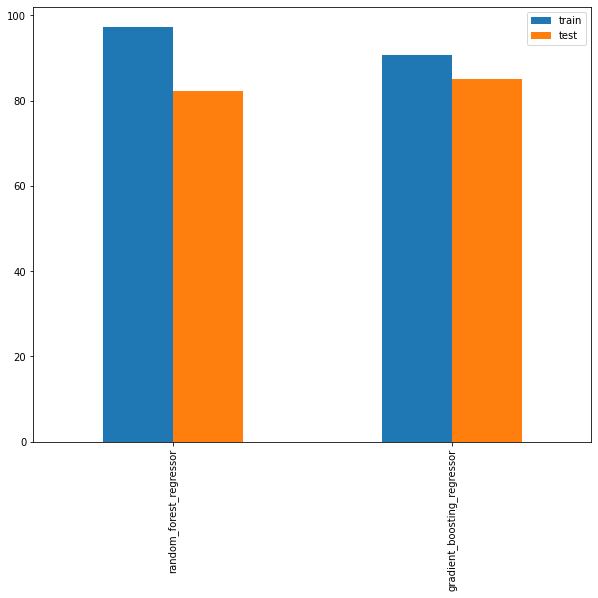

In [83]:
compare_models=pd.DataFrame(
            {
             "train":{'random_forest_regressor':rf_train,'gradient_boosting_regressor':f_train},
             "test":{'random_forest_regressor':rf_test,'gradient_boosting_regressor':f_test}})



compare_models.plot.bar(figsize=(10,8));